In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import data
import coordinate
import xp_settings as settings
settings.set_gpu(-1)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(10, 3)
(0, 3)


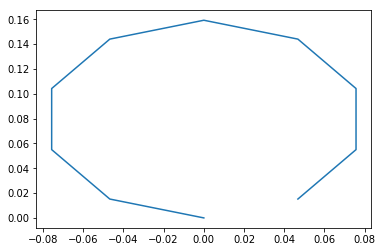

In [13]:
rad_per_step = 2*np.pi/10
m_per_step = 0.05
num_step = 10
path = data.generate_arc_path(num_step, rad_per_step, m_per_step)
path_es,idx_list = data.get_evenly_spaced_points(path,1.0)
print(path.shape)
print(path_es.shape)
plt.plot(path[:,0],path[:,1])
plt.scatter(path_es[:,0],path_es[:,1])
plt.show()
data.write_path_csv(path,"path.csv")

(955, 3)
(0, 3)
86
[]
0
[[2.         0.5        1.57079637]
 [2.03999996 0.01999998 0.        ]
 [2.1099999  0.01999998 0.        ]
 [2.15999985 0.01999998 0.        ]
 [2.21000004 0.01999998 0.        ]
 [2.25       0.01999998 0.        ]
 [2.29999995 0.01999998 0.        ]
 [2.3599999  0.01999998 0.        ]
 [2.40999985 0.01999998 0.        ]
 [2.46000004 0.01999998 0.        ]
 [2.50999999 0.01999998 0.        ]]


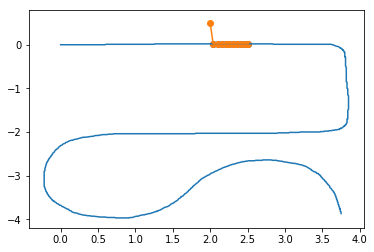

In [20]:
path = data.read_path_csv('pathData/sample_path.csv')
print(path.shape)
print(path_es.shape)
plt.plot(path[:,0],path[:,1])
#
pos = np.array((2.0,0.5,np.pi/2),np.float32)
idx = data.get_nearly_point_idx(path,pos)
path_input_gl = data.get_waypoints(idx,path,num_step,m_per_step)
plt.scatter(path_input_gl[:,0],path_input_gl[:,1])
print(idx)
print(idx_list)
print(data.get_next_path_idx(idx,idx_list))
target = np.vstack((pos,path_input_gl))
print(target)
plt.scatter(target[:,0],target[:,1])
plt.plot(target[:,0],target[:,1])
#
plt.show()

(-5, 5)

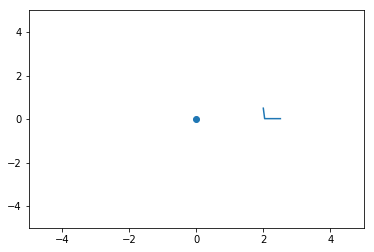

In [21]:
plt.plot(target[:,0],target[:,1])
plt.scatter(0,0)
plt.xlim(-5,5)
plt.ylim(-5,5)

(-5, 5)

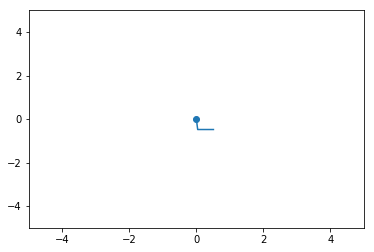

In [22]:
localpath = coordinate.translate(target,pos[0],pos[1])
plt.plot(localpath[:,0],localpath[:,1])
plt.scatter(0,0)
plt.xlim(-5,5)
plt.ylim(-5,5)

(-5, 5)

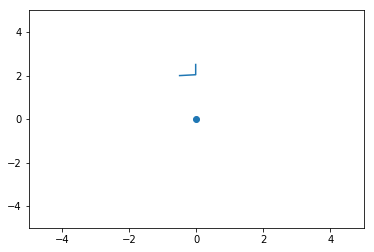

In [23]:
localpath = coordinate.rotate(target,pos[2])
plt.plot(localpath[:,0],localpath[:,1])
plt.scatter(0,0)
plt.xlim(-5,5)
plt.ylim(-5,5)

(-5, 5)

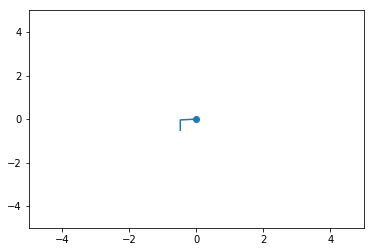

In [24]:
localpath = coordinate.globalpos_to_localpos(target,pos)
plt.plot(localpath[:,0],localpath[:,1])
plt.scatter(0,0)
plt.xlim(-5,5)
plt.ylim(-5,5)